In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data=pd.read_csv('/content/data4.csv')

In [ ]:
data.head()

,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,4664938,330,CASH_OUT,129328.39,C1074072753,0.0,0.0,C2012503134,1293646.35,1422974.73,0.0
1,3533252,259,CASH_OUT,243879.86,C538474946,0.0,0.0,C972069609,6772791.88,7016671.73,0.0
2,4656054,330,PAYMENT,4842.50,C1287637309,0.0,0.0,M1876888696,0.00,0.00,0.0
3,4164440,304,CASH_OUT,22218.01,C238330570,0.0,0.0,C170292643,756643.32,778861.33,0.0
4,4081499,301,CASH_OUT,445921.93,C1256416335,4092.0,0.0,C1816206335,80548.08,526470.01,0.0


In [ ]:
data.shape

(15541, 11)

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
data.keys()

Index(['Unnamed: 0', 'step', 'type', 'amount', 'nameOrig', 'oldbalanceOrig',
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest',
       'isFraud'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15541 entries, 0 to 15540
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      15541 non-null  int64  
 1   step            15541 non-null  int64  
 2   type            15541 non-null  object 
 3   amount          15541 non-null  float64
 4   nameOrig        15541 non-null  object 
 5   oldbalanceOrig  15541 non-null  float64
 6   newbalanceOrig  15541 non-null  float64
 7   nameDest        15541 non-null  object 
 8   oldbalanceDest  15541 non-null  float64
 9   newbalanceDest  15541 non-null  float64
 10  isFraud         15541 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 1.3+ MB


In [ ]:
data=data.drop(['Unnamed: 0','nameOrig','nameDest'],axis=1)

In [ ]:
data.shape

(15541, 8)

In [ ]:
data['isFraud'].value_counts()

0.0    11000
1.0     4541
Name: isFraud, dtype: int64

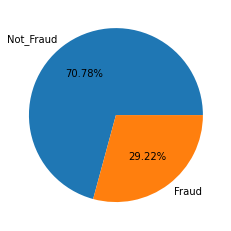

In [ ]:
plt.pie(data['isFraud'].value_counts(),labels=['Not_Fraud','Fraud'],autopct='%0.2f%%')
plt.show()

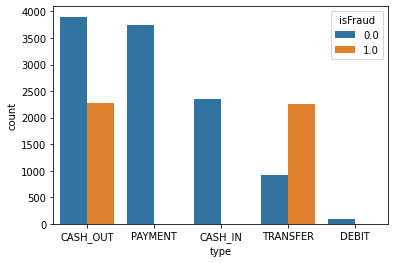

In [ ]:
#sns.countplot('isFraud',data=data)
sns.countplot(data=data, x="type", hue="isFraud")
plt.show()

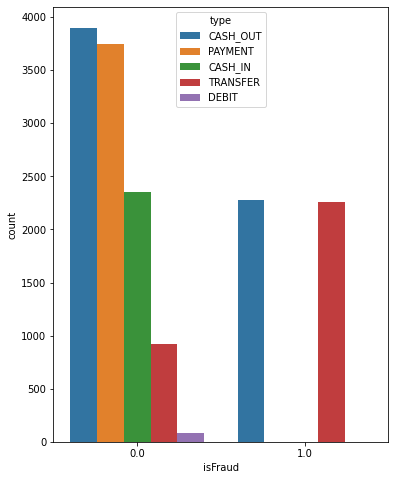

In [ ]:
plt.figure(figsize=(6,8))
sns.countplot(data=data, x="isFraud", hue="type")
plt.show()

In [ ]:
data.tail()

,step,type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
15536,404,CASH_OUT,540914.12,540914.12,0.0,36447.52,577361.64,1.0
15537,404,TRANSFER,932691.00,932691.00,0.0,0.00,0.00,1.0
15538,404,CASH_OUT,932691.00,932691.00,0.0,93390.82,1026081.82,1.0
15539,405,TRANSFER,973805.75,973805.75,0.0,0.00,0.00,1.0
15540,405,CASH_OUT,973805.75,973805.75,0.0,0.00,973805.75,1.0


In [ ]:
data['type'].value_counts()

CASH_OUT    6180
PAYMENT     3746
TRANSFER    3180
CASH_IN     2352
DEBIT         83
Name: type, dtype: int64

In [ ]:
dict1={'CASH_OUT':0,'TRANSFER':1,'PAYMENT':2,'CASH_IN':3,'DEBIT':4}

In [ ]:
data['type']=data['type'].map(dict1)

In [ ]:
data.head(50)

,step,type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,330,0,129328.39,0.00,0.00,1293646.35,1422974.73,0.0
1,259,0,243879.86,0.00,0.00,6772791.88,7016671.73,0.0
2,330,2,4842.50,0.00,0.00,0.00,0.00,0.0
3,304,0,22218.01,0.00,0.00,756643.32,778861.33,0.0
4,301,0,445921.93,4092.00,0.00,80548.08,526470.01,0.0
5,354,3,221105.22,9134524.17,9355629.40,455044.31,233939.08,0.0
6,179,3,276374.50,27481172.07,27757546.58,1433538.51,1157164.01,0.0
7,260,1,118942.05,0.00,0.00,928862.25,1047804.31,0.0
8,354,1,356775.44,0.00,0.00,11997632.45,12354407.90,0.0
9,119,2,17615.05,301557.94,283942.89,0.00,0.00,0.0


In [ ]:
data.tail()

,step,type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
15536,404,0,540914.12,540914.12,0.0,36447.52,577361.64,1.0
15537,404,1,932691.00,932691.00,0.0,0.00,0.00,1.0
15538,404,0,932691.00,932691.00,0.0,93390.82,1026081.82,1.0
15539,405,1,973805.75,973805.75,0.0,0.00,0.00,1.0
15540,405,0,973805.75,973805.75,0.0,0.00,973805.75,1.0


In [ ]:
X=data.drop('isFraud',axis=1)

In [ ]:
X

,step,type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest
0,330,0,129328.39,0.00,0.0,1293646.35,1422974.73
1,259,0,243879.86,0.00,0.0,6772791.88,7016671.73
2,330,2,4842.50,0.00,0.0,0.00,0.00
3,304,0,22218.01,0.00,0.0,756643.32,778861.33
4,301,0,445921.93,4092.00,0.0,80548.08,526470.01
...,...,...,...,...,...,...,...
15536,404,0,540914.12,540914.12,0.0,36447.52,577361.64
15537,404,1,932691.00,932691.00,0.0,0.00,0.00
15538,404,0,932691.00,932691.00,0.0,93390.82,1026081.82
15539,405,1,973805.75,973805.75,0.0,0.00,0.00


In [ ]:
y=data['isFraud']

In [ ]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
15536    1.0
15537    1.0
15538    1.0
15539    1.0
15540    1.0
Name: isFraud, Length: 15541, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10878, 7)
(4663, 7)
(10878,)
(4663,)


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

In [ ]:
X_train_sc

array([[-1.7192121 ,  0.7387326 , -0.34990987, ..., -0.24331693,
        -0.34239808, -0.39765216],
       [ 0.88515045, -1.03168671, -0.11425115, ..., -0.24331693,
        -0.15392734, -0.10986177],
       [-0.50158805,  0.7387326 , -0.3660793 , ..., -0.24331693,
        -0.34239808, -0.39765216],
       ...,
       [ 1.5024182 , -0.14647705,  0.11332575, ..., -0.24331693,
         1.16753248,  1.14999022],
       [ 0.27633842, -1.03168671,  0.12648567, ..., -0.24331693,
         0.09596679,  0.223211  ],
       [-1.70230066, -1.03168671, -0.23407462, ..., -0.24331693,
         1.86757508,  1.59293552]])

In [ ]:
X_test_sc

array([[ 1.13882213, -0.14647705,  0.10242202, ..., -0.24331693,
        -0.34239808, -0.17004804],
       [-1.76994644, -0.14647705, -0.31026176, ..., -0.24331693,
        -0.34239808, -0.39765216],
       [-1.75303499, -1.03168671, -0.26771994, ..., -0.16006226,
        -0.29094367, -0.39765216],
       ...,
       [-1.79531361, -1.03168671,  6.52386822, ..., -0.24331693,
        -0.34239808,  2.89083721],
       [-0.94974135, -0.14647705, -0.27393598, ..., -0.24331693,
        -0.34239808, -0.39765216],
       [ 0.13259114, -1.03168671,  0.63119464, ..., -0.24331693,
        -0.23673716,  0.17558904]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model1=LogisticRegression()

In [ ]:
model1.fit(X_train_sc,y_train)

LogisticRegression()

In [ ]:
y_pred1=model1.predict(X_test_sc)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93      3286
         1.0       0.96      0.65      0.78      1377

    accuracy                           0.89      4663
   macro avg       0.92      0.82      0.85      4663
weighted avg       0.90      0.89      0.88      4663



In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model2=GaussianNB()

In [ ]:
model2.fit(X_train_sc,y_train)

GaussianNB()

In [ ]:
y_pred2=model2.predict(X_test_sc)

In [ ]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

         0.0       0.82      0.79      0.81      3286
         1.0       0.54      0.60      0.57      1377

    accuracy                           0.73      4663
   macro avg       0.68      0.69      0.69      4663
weighted avg       0.74      0.73      0.74      4663



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model3=KNeighborsClassifier()

In [ ]:
model3.fit(X_train_sc,y_train)

KNeighborsClassifier()

In [ ]:
y_pred3=model3.predict(X_test_sc)

In [ ]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      3286
         1.0       0.94      0.84      0.89      1377

    accuracy                           0.94      4663
   macro avg       0.94      0.91      0.92      4663
weighted avg       0.94      0.94      0.94      4663



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model4=DecisionTreeClassifier()

In [ ]:
model4.fit(X_train_sc,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred4=model4.predict(X_test_sc)

In [ ]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3286
         1.0       0.98      0.98      0.98      1377

    accuracy                           0.99      4663
   macro avg       0.98      0.98      0.98      4663
weighted avg       0.99      0.99      0.99      4663



In [ ]:

from sklearn import tree

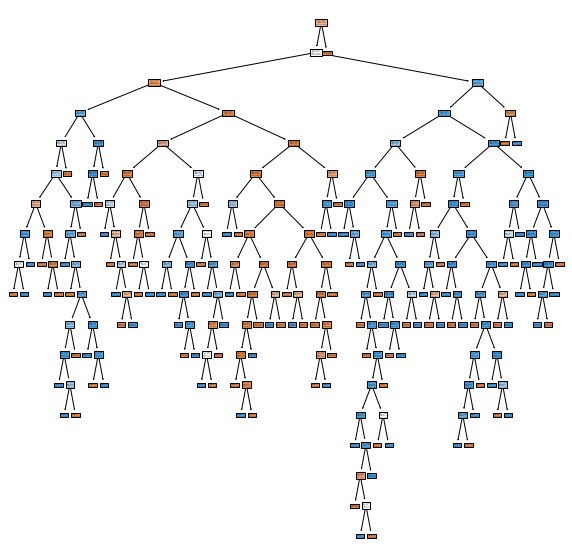

In [ ]:
plt.figure(figsize=(10,10))
tree.plot_tree(model4,filled=True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [ ]:
model5=RandomForestClassifier()

In [ ]:
model5.fit(X_train_sc,y_train)

RandomForestClassifier()

In [ ]:
y_pred5=model5.predict(X_test_sc)

In [ ]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3286
         1.0       0.97      0.98      0.98      1377

    accuracy                           0.99      4663
   macro avg       0.98      0.99      0.98      4663
weighted avg       0.99      0.99      0.99      4663



In [ ]:
model6=AdaBoostClassifier()

In [ ]:
model6.fit(X_train_sc,y_train)

AdaBoostClassifier()

In [ ]:
y_pred6=model6.predict(X_test_sc)

In [ ]:
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      3286
         1.0       0.95      0.95      0.95      1377

    accuracy                           0.97      4663
   macro avg       0.97      0.97      0.97      4663
weighted avg       0.97      0.97      0.97      4663



In [ ]:
model5.predict([[239,2,5178.72,400705.00,395526.28,0.00,0.00]])

array([0.])

In [ ]:
model5.predict([[369,0,89596.79,89596.79,0.0,0.00,89596.79]])

array([0.])

In [ ]:
import pickle 

In [141]:

pickle_out = open("model5.pkl","wb")
pickle.dump(model5, pickle_out)
pickle_out.close()